In [1]:
import xarray as xr 
import matplotlib.pyplot as plt 
import glob 

In [2]:
files = glob.glob('/scratch/ct715/isca_data/held_suarez_delh_omega/*/*.nc')

ds = xr.open_mfdataset(files)

In [3]:
ds

<xarray.Dataset>
Dimensions:      (lon: 128, lonb: 129, lat: 64, latb: 65, time: 360, nv: 2,
                  phalf: 26, pfull: 25)
Coordinates:
  * lon          (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lonb         (lonb) float64 -1.406 1.406 4.219 7.031 ... 353.0 355.8 358.6
  * lat          (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 82.31 85.1 87.86
  * latb         (latb) float64 -90.0 -86.58 -83.76 -80.96 ... 83.76 86.58 90.0
  * time         (time) object 2000-01-01 12:00:00 ... 2000-12-30 12:00:00
  * nv           (nv) float64 1.0 2.0
  * phalf        (phalf) float64 0.0 6.165 12.71 22.59 ... 786.6 886.9 1e+03
  * pfull        (pfull) float64 2.268 9.244 17.42 28.92 ... 741.7 836.3 942.9
Data variables:
    ps           (time, lat, lon) float32 dask.array<chunksize=(30, 64, 128), meta=np.ndarray>
    bk           (time, phalf) float32 dask.array<chunksize=(30, 26), meta=np.ndarray>
    pk           (time, phalf) float32 dask.array<chunksize=(30, 26), meta=np.ndarray>
    ucomp        (time, pfull, lat, lon) float32 dask.array<chunksize=(30, 25, 64, 128), meta=np.ndarray>
    vcomp        (time, pfull, lat, lon) float32 dask.array<chunksize=(30, 25, 64, 128), meta=np.ndarray>
    temp         (time, pfull, lat, lon) float32 dask.array<chunksize=(30, 25, 64, 128), meta=np.ndarray>
    omega        (time, pfull, lat, lon) float32 dask.array<chunksize=(30, 25, 64, 128), meta=np.ndarray>
    average_T1   (time) datetime64[ns] dask.array<chunksize=(30,), meta=np.ndarray>
    average_T2   (time) datetime64[ns] dask.array<chunksize=(30,), meta=np.ndarray>
    average_DT   (time) timedelta64[ns] dask.array<chunksize=(30,), meta=np.ndarray>
    time_bounds  (time, nv) timedelta64[ns] dask.array<chunksize=(30, 2), meta=np.ndarray>
Attributes:
    filename:   /scratch/ct715/isca_work/experiment/held_suarez_delh_omega/ru...
    title:      FMS Model results
    grid_type:  regular
    grid_tile:  N/A

In [4]:
import sys
sys.path.append('/home/links/ct715/eddy_feedback/')

import functions.eddy_feedback as ef 
import functions.aos_functions as aos

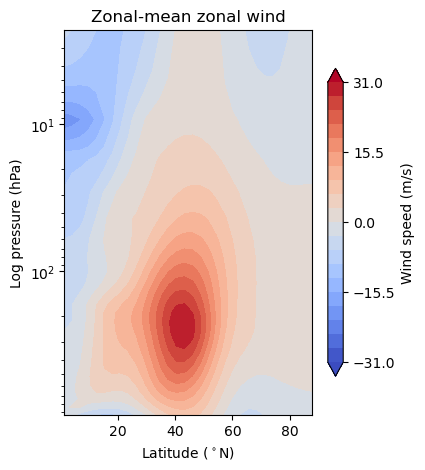

In [5]:
# This works without having to redefine ds in notebook!

ef.plot_ubar(ds, yscale='log', latitude='NH')

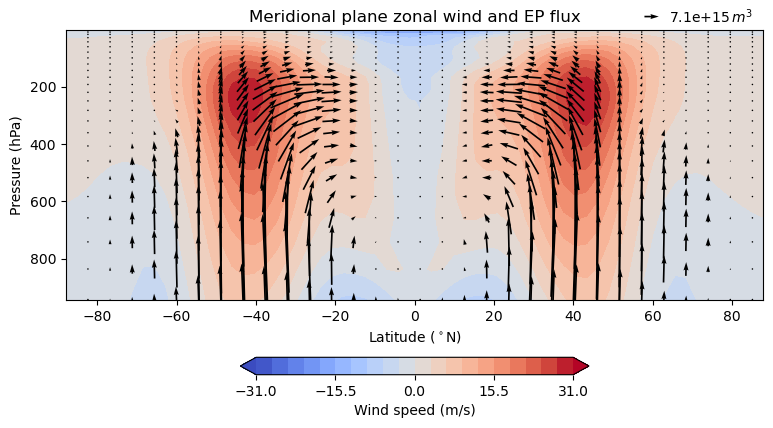

In [6]:
ef.plot_ubar_epflux(ds, skip_lat=2, skip_pres=1)

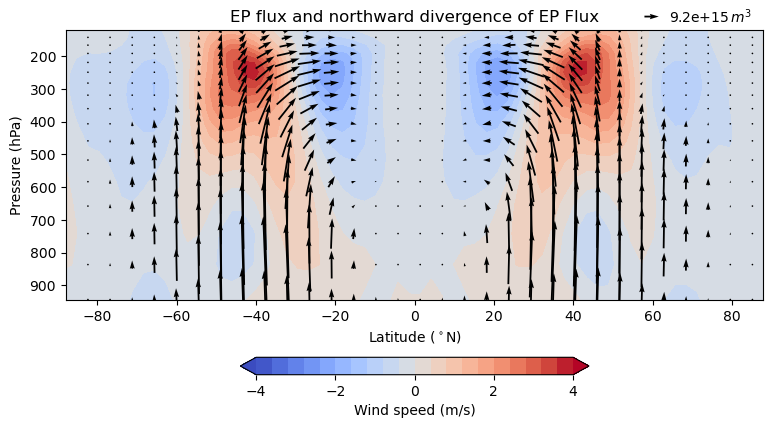

In [7]:
ef.plot_epfluxes_div(ds, skip_lat=2) 

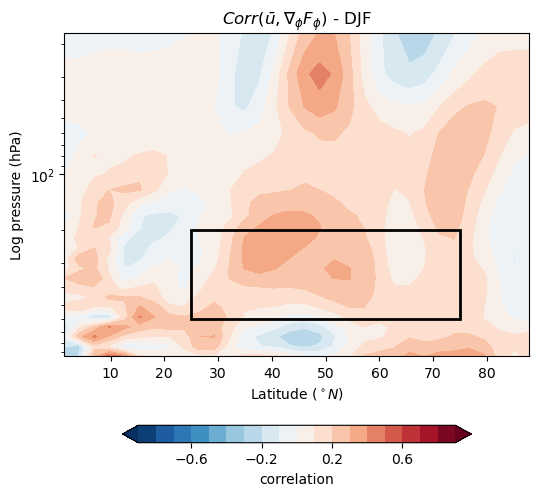

In [8]:
ef.correlation_contourf(ds)

# Winter months

There are no months in Held_Suarez. Also probably strange results because not allowing spin-up.

In [9]:
# extract DJF months from dataset
import datetime as dt

# ds = ds.where(ds.time.dt.month.isin([12, 1, 2]))
ds = ds.sel(time=ds.time.dt.month.isin([12, 1, 2]))
ds

<xarray.Dataset>
Dimensions:      (lon: 128, lonb: 129, lat: 64, latb: 65, time: 90, nv: 2,
                  phalf: 26, pfull: 25)
Coordinates:
  * lon          (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lonb         (lonb) float64 -1.406 1.406 4.219 7.031 ... 353.0 355.8 358.6
  * lat          (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 82.31 85.1 87.86
  * latb         (latb) float64 -90.0 -86.58 -83.76 -80.96 ... 83.76 86.58 90.0
  * time         (time) object 2000-01-01 12:00:00 ... 2000-12-30 12:00:00
  * nv           (nv) float64 1.0 2.0
  * phalf        (phalf) float64 0.0 6.165 12.71 22.59 ... 786.6 886.9 1e+03
  * pfull        (pfull) float64 2.268 9.244 17.42 28.92 ... 741.7 836.3 942.9
Data variables:
    ps           (time, lat, lon) float32 dask.array<chunksize=(30, 64, 128), meta=np.ndarray>
    bk           (time, phalf) float32 dask.array<chunksize=(30, 26), meta=np.ndarray>
    pk           (time, phalf) float32 dask.array<chunksize=(30, 26), meta=np.ndarray>
    ucomp        (time, pfull, lat, lon) float32 dask.array<chunksize=(30, 25, 64, 128), meta=np.ndarray>
    vcomp        (time, pfull, lat, lon) float32 dask.array<chunksize=(30, 25, 64, 128), meta=np.ndarray>
    temp         (time, pfull, lat, lon) float32 dask.array<chunksize=(30, 25, 64, 128), meta=np.ndarray>
    omega        (time, pfull, lat, lon) float32 dask.array<chunksize=(30, 25, 64, 128), meta=np.ndarray>
    average_T1   (time) datetime64[ns] dask.array<chunksize=(30,), meta=np.ndarray>
    average_T2   (time) datetime64[ns] dask.array<chunksize=(30,), meta=np.ndarray>
    average_DT   (time) timedelta64[ns] dask.array<chunksize=(30,), meta=np.ndarray>
    time_bounds  (time, nv) timedelta64[ns] dask.array<chunksize=(30, 2), meta=np.ndarray>
Attributes:
    filename:   /scratch/ct715/isca_work/experiment/held_suarez_delh_omega/ru...
    title:      FMS Model results
    grid_type:  regular
    grid_tile:  N/A

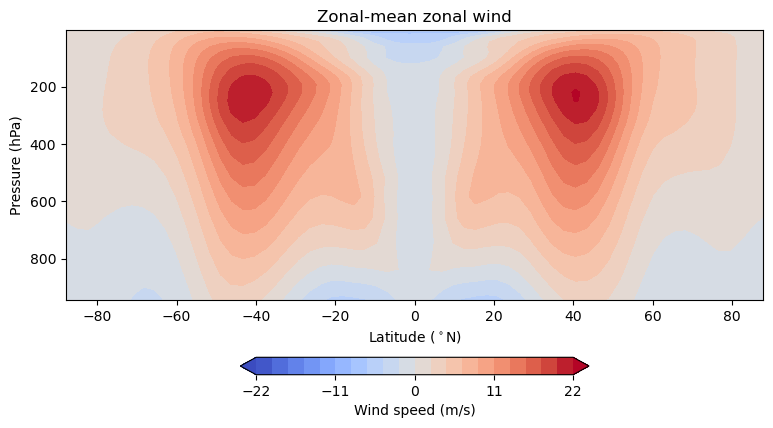

In [10]:
ef.plot_ubar(ds)

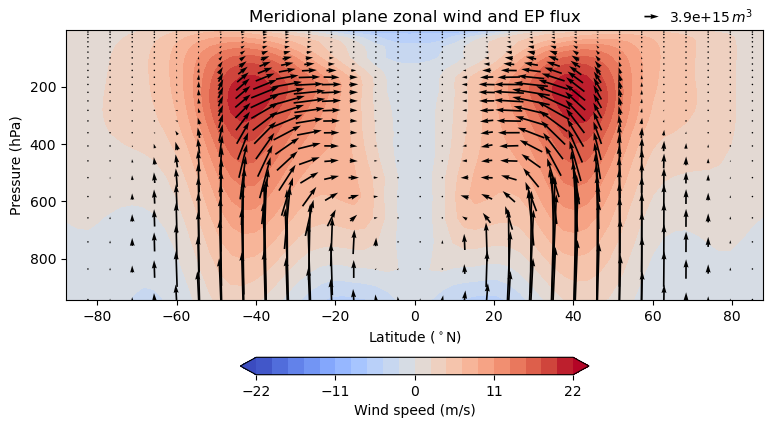

In [11]:
ef.plot_ubar_epflux(ds, skip_lat=2)

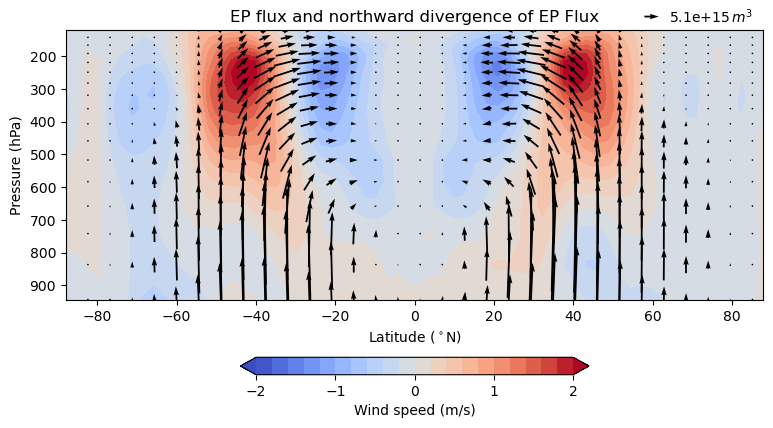

In [12]:
ef.plot_epfluxes_div(ds, skip_lat=2)

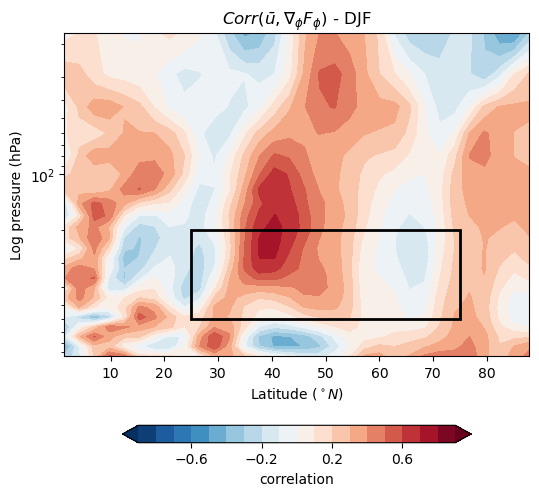

In [13]:
ef.correlation_contourf(ds)

In [14]:
ds.pfull

<xarray.DataArray 'pfull' (pfull: 25)>
array([  2.268139,   9.244346,  17.418033,  28.918805,  43.467332,  60.482619,
        79.335263,  99.540617, 120.848953, 143.251083, 166.938509, 192.250909,
       219.62966 , 249.584362, 282.672685, 319.491151, 360.674092, 406.898484,
       458.893027, 517.450416, 583.442015, 657.834415, 741.707383, 836.272889,
       942.895058])
Coordinates:
  * pfull    (pfull) float64 2.268 9.244 17.42 28.92 ... 657.8 741.7 836.3 942.9
Attributes:
    long_name:       approx full pressure level
    units:           hPa
    cartesian_axis:  Z
    positive:        down